In [255]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [256]:
data_direc = "/Users/kevin_smith/Documents/GitHub/Applied-Machine-Learning/hw4/data/"
train = pd.read_csv(data_direc + "Gisette/gisette_train.csv")
train_labels = pd.read_csv(data_direc + "Gisette/gisette_train_labels.csv")
test = pd.read_csv(data_direc + "Gisette/gisette_valid.csv")
test_labels = pd.read_csv(data_direc + "Gisette/gisette_valid_labels.csv")
train = np.delete(train, 5000, axis=1)
test = np.delete(test, 5000, axis=1)

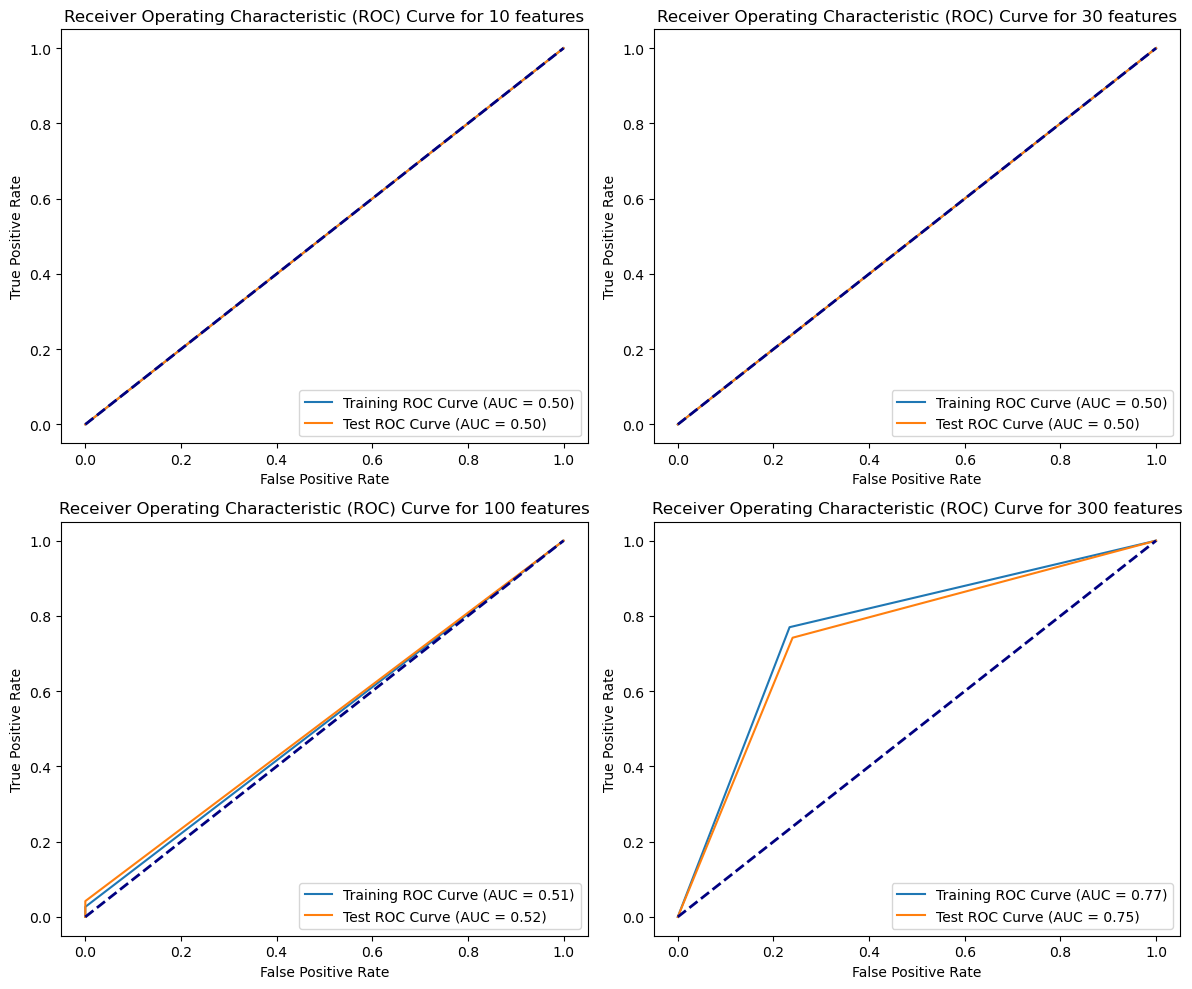

Results:
   Number of Selected Features  Lambda  Train Misclassification Error  \
0                           10    0.05                       0.420000   
1                           30    0.10                       0.308333   
2                          100    0.10                       0.197667   
3                          300    0.10                       0.069500   

   Test Misclassification Error  
0                         0.440  
1                         0.302  
2                         0.204  
3                         0.092  


In [257]:
# Assuming train, test, train_labels, and test_labels are defined

scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

max_iter = 100
learning_rate = 1 / train.shape[1]

# Lists to store results
train_errors = []
test_errors = []
num_selected_features = []
lambda_values = []

# Define a list of lambda values to test
lambda_values_to_test = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, num_features in enumerate([10, 30, 100, 300]):
    test_errors_for_lda = []
    train_errors_for_lda = []
    weights = np.zeros((num_features, 1))
    train_temp = pd.DataFrame(train).loc[:, range(num_features)].to_numpy()
    for lda in lambda_values_to_test:
        temp = weights.copy()
        for iter in range(max_iter):
            temp = weights + learning_rate * np.dot(train_temp.T, (train_labels - 1 / (1 + np.exp(-np.dot(train_temp, weights)))))
            temp[np.abs(temp) <= lda] = 0
            weights = temp

        train_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(train).loc[:, range(num_features)].to_numpy() @ weights))) > 0.5
        test_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(test).loc[:, range(num_features)].to_numpy() @ weights))) > 0.5

        # Calculate misclassification error
        test_error = 1 - accuracy_score(test_labels, test_labels_pred)
        train_error = 1 - accuracy_score(train_labels, train_labels_pred)
        test_errors_for_lda.append(test_error)
        train_errors_for_lda.append(train_error)

    # Find the best lambda (minimize test error)
    best_lda_index = np.argmin(test_errors_for_lda)
    best_lda = lambda_values_to_test[best_lda_index]
    best_test_error = test_errors_for_lda[best_lda_index]

    train_errors.append(train_errors_for_lda[best_lda_index])
    test_errors.append(best_test_error)
    num_selected_features.append(num_features)
    lambda_values.append(best_lda)

    # Plot ROC curve
    false_pos_rate_train, true_pos_rate_train, _ = roc_curve(train_labels, train_labels_pred)
    roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)

    false_pos_rate_test, true_pos_rate_test, _ = roc_curve(test_labels, test_labels_pred)
    roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

    ax = axs[i // 2, i % 2]
    ax.plot(false_pos_rate_train, true_pos_rate_train,
             label="Training ROC Curve (AUC = {:.2f})".format(roc_auc_train))
    ax.plot(false_pos_rate_test, true_pos_rate_test,
             label="Test ROC Curve (AUC = {:.2f})".format(roc_auc_test))
    ax.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"Receiver Operating Characteristic (ROC) Curve for {num_features} features")
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Create a table of results
results_df = pd.DataFrame({
    "Number of Selected Features": num_selected_features,
    "Lambda": lambda_values,
    "Train Misclassification Error": train_errors,
    "Test Misclassification Error": test_errors
})

print("Results:")
print(results_df)


In [258]:
data_direc
train = pd.read_csv(data_direc + "dexter/dexter_train.csv", header = None)
train_labels = pd.read_csv(data_direc + "dexter/dexter_train_labels.csv", header = None)
test = pd.read_csv(data_direc + "dexter/dexter_valid.csv", header = None)
test_labels = pd.read_csv(data_direc + "dexter/dexter_valid_labels.csv", header = None)

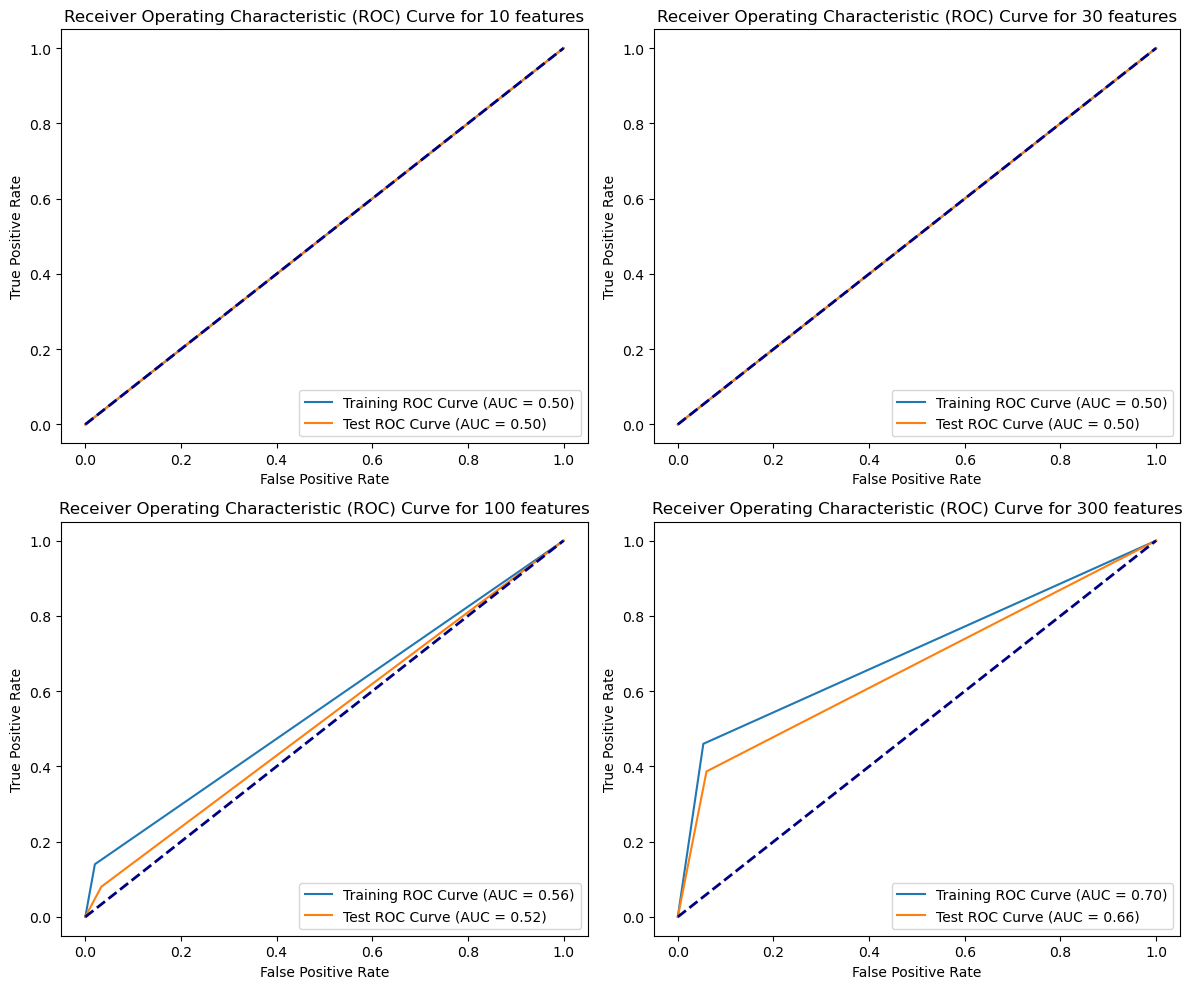

Results:
   Number of Selected Features  Lambda  Train Misclassification Error  \
0                           10  0.5000                       0.500000   
1                           30  0.5000                       0.500000   
2                          100  0.0001                       0.506667   
3                          300  0.0001                       0.666667   

   Test Misclassification Error  
0                      0.503333  
1                      0.503333  
2                      0.543333  
3                      0.773333  


In [259]:
# Assuming train, test, train_labels, and test_labels are defined

scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

max_iter = 100
learning_rate = 1 / train.shape[1]

# Lists to store results
train_errors = []
test_errors = []
num_selected_features = []
lambda_values = []

# Define a list of lambda values to test
lambda_values_to_test = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, num_features in enumerate([10, 30, 100, 300]):
    test_errors_for_lda = []
    train_errors_for_lda = []
    weights = np.zeros((num_features, 1))
    train_temp = pd.DataFrame(train).loc[:, range(num_features)].to_numpy()
    for lda in lambda_values_to_test:
        temp = weights.copy()
        for iter in range(max_iter):
            temp = weights + learning_rate * np.dot(train_temp.T, (train_labels - 1 / (1 + np.exp(-np.dot(train_temp, weights)))))
            temp[np.abs(temp) <= lda] = 0
            weights = temp

        train_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(train).loc[:, range(num_features)].to_numpy() @ weights))) > 0.5
        test_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(test).loc[:, range(num_features)].to_numpy() @ weights))) > 0.5

        # Calculate misclassification error
        test_error = 1 - accuracy_score(test_labels, test_labels_pred)
        train_error = 1 - accuracy_score(train_labels, train_labels_pred)
        test_errors_for_lda.append(test_error)
        train_errors_for_lda.append(train_error)

    # Find the best lambda (minimize test error)
    best_lda_index = np.argmin(test_errors_for_lda)
    best_lda = lambda_values_to_test[best_lda_index]
    best_test_error = test_errors_for_lda[best_lda_index]

    train_errors.append(train_errors_for_lda[best_lda_index])
    test_errors.append(best_test_error)
    num_selected_features.append(num_features)
    lambda_values.append(best_lda)

    # Plot ROC curve
    false_pos_rate_train, true_pos_rate_train, _ = roc_curve(train_labels, train_labels_pred)
    roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)

    false_pos_rate_test, true_pos_rate_test, _ = roc_curve(test_labels, test_labels_pred)
    roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

    ax = axs[i // 2, i % 2]
    ax.plot(false_pos_rate_train, true_pos_rate_train,
             label="Training ROC Curve (AUC = {:.2f})".format(roc_auc_train))
    ax.plot(false_pos_rate_test, true_pos_rate_test,
             label="Test ROC Curve (AUC = {:.2f})".format(roc_auc_test))
    ax.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"Receiver Operating Characteristic (ROC) Curve for {num_features} features")
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Create a table of results
results_df = pd.DataFrame({
    "Number of Selected Features": num_selected_features,
    "Lambda": lambda_values,
    "Train Misclassification Error": train_errors,
    "Test Misclassification Error": test_errors
})

print("Results:")
print(results_df)


In [260]:
train = pd.read_fwf(data_direc + "madelon/madelon_train.data", header = None)
train_labels = pd.read_fwf(data_direc + "madelon/madelon_train.labels", header = None)
test = pd.read_fwf(data_direc + "madelon/madelon_valid.data", header = None)
test_labels = pd.read_fwf(data_direc + "madelon/madelon_valid.labels", header = None)

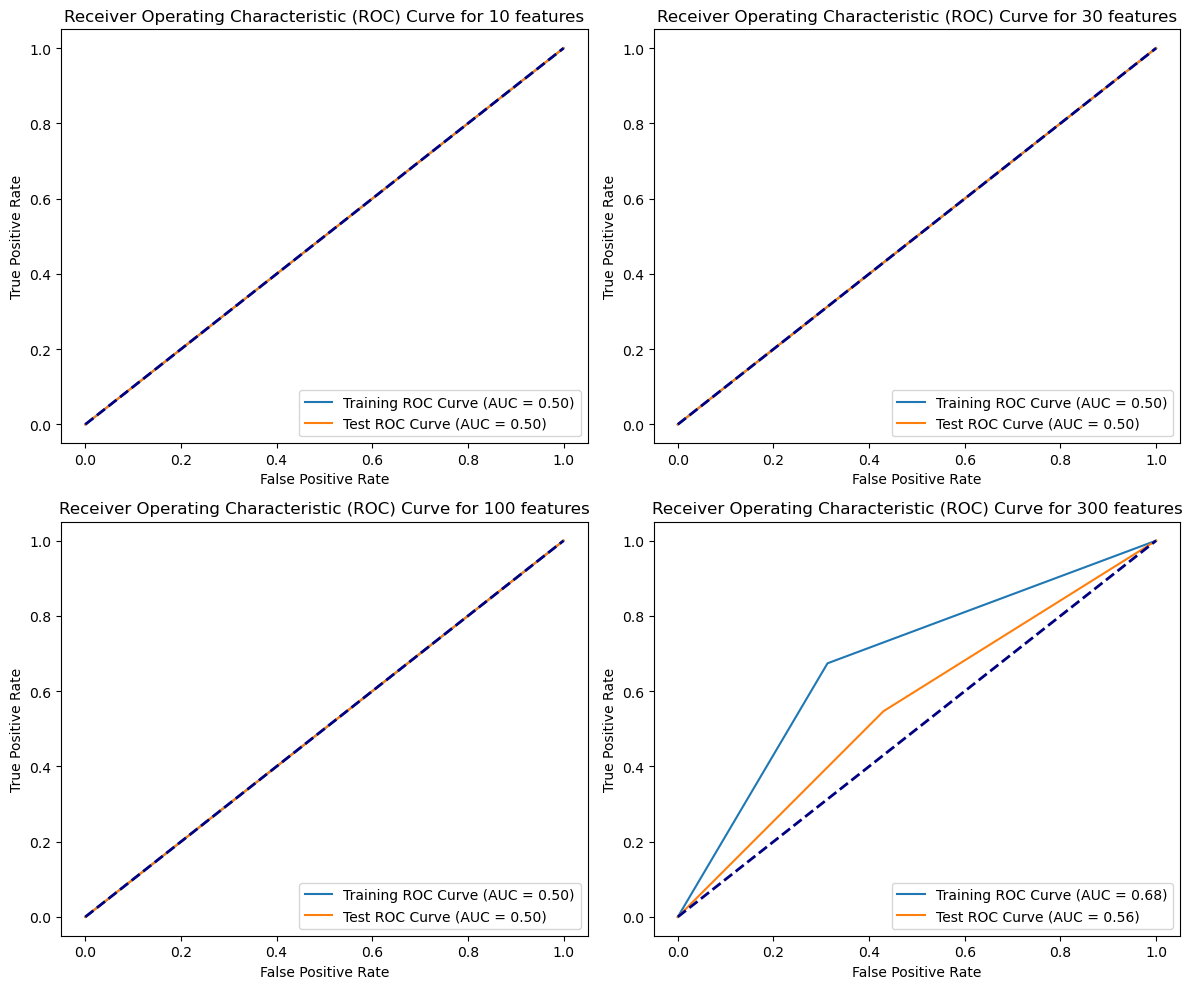

Results:
   Number of Selected Features  Lambda  Train Misclassification Error  \
0                           10  0.1000                         0.7405   
1                           30  0.1000                         0.7295   
2                          100  0.0001                         0.6940   
3                          300  0.0001                         0.6640   

   Test Misclassification Error  
0                      0.753333  
1                      0.741667  
2                      0.703333  
3                      0.726667  


In [261]:
# Assuming train, test, train_labels, and test_labels are defined

scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

max_iter = 100
learning_rate = 1 / train.shape[1]

# Lists to store results
train_errors = []
test_errors = []
num_selected_features = []
lambda_values = []

# Define a list of lambda values to test
lambda_values_to_test = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, num_features in enumerate([10, 30, 100, 300]):
    test_errors_for_lda = []
    train_errors_for_lda = []
    weights = np.zeros((num_features, 1))
    train_temp = pd.DataFrame(train).loc[:, range(num_features)].to_numpy()
    for lda in lambda_values_to_test:
        temp = weights.copy()
        for iter in range(max_iter):
            temp = weights + learning_rate * np.dot(train_temp.T, (train_labels - 1 / (1 + np.exp(-np.dot(train_temp, weights)))))
            temp[np.abs(temp) <= lda] = 0
            weights = temp

        train_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(train).loc[:, range(num_features)].to_numpy() @ weights))) > 0.5
        test_labels_pred = (1 / (1 + np.exp(-pd.DataFrame(test).loc[:, range(num_features)].to_numpy() @ weights))) > 0.5

        # Calculate misclassification error
        test_error = 1 - accuracy_score(test_labels, test_labels_pred)
        train_error = 1 - accuracy_score(train_labels, train_labels_pred)
        test_errors_for_lda.append(test_error)
        train_errors_for_lda.append(train_error)

    # Find the best lambda (minimize test error)
    best_lda_index = np.argmin(test_errors_for_lda)
    best_lda = lambda_values_to_test[best_lda_index]
    best_test_error = test_errors_for_lda[best_lda_index]

    train_errors.append(train_errors_for_lda[best_lda_index])
    test_errors.append(best_test_error)
    num_selected_features.append(num_features)
    lambda_values.append(best_lda)

    # Plot ROC curve
    false_pos_rate_train, true_pos_rate_train, _ = roc_curve(train_labels, train_labels_pred)
    roc_auc_train = auc(false_pos_rate_train, true_pos_rate_train)

    false_pos_rate_test, true_pos_rate_test, _ = roc_curve(test_labels, test_labels_pred)
    roc_auc_test = auc(false_pos_rate_test, true_pos_rate_test)

    ax = axs[i // 2, i % 2]
    ax.plot(false_pos_rate_train, true_pos_rate_train,
             label="Training ROC Curve (AUC = {:.2f})".format(roc_auc_train))
    ax.plot(false_pos_rate_test, true_pos_rate_test,
             label="Test ROC Curve (AUC = {:.2f})".format(roc_auc_test))
    ax.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"Receiver Operating Characteristic (ROC) Curve for {num_features} features")
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Create a table of results
results_df = pd.DataFrame({
    "Number of Selected Features": num_selected_features,
    "Lambda": lambda_values,
    "Train Misclassification Error": train_errors,
    "Test Misclassification Error": test_errors
})

print("Results:")
print(results_df)
